In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of SVM with linear kernel: {accuracy_linear:.2f}")


Accuracy of SVM with linear kernel: 0.96


In [9]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM with RBF kernel: {accuracy_rbf:.2f}")


Accuracy of SVM with RBF kernel: 0.98


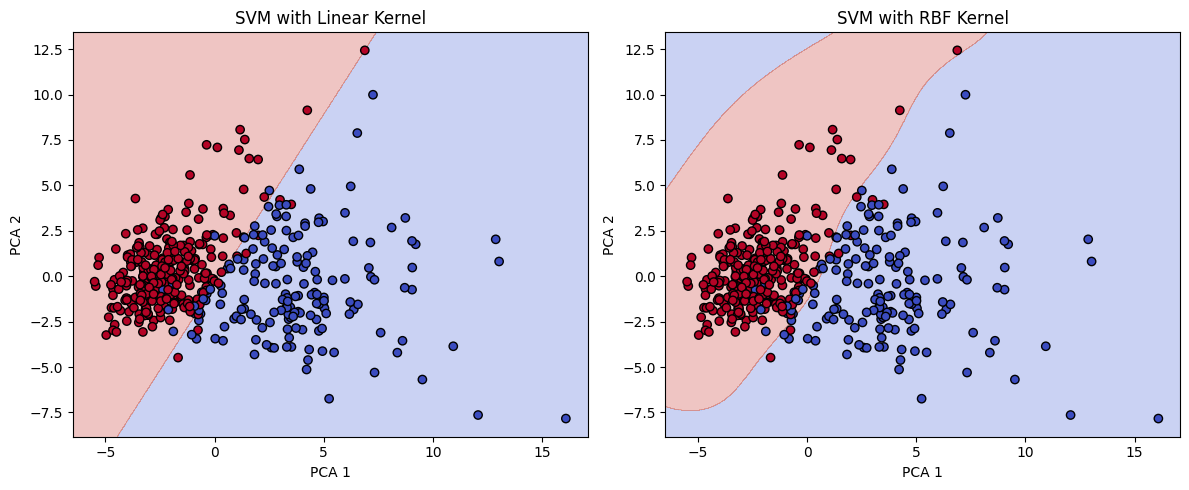

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

# Train and plot for linear SVM
svm_linear = SVC(kernel='linear').fit(X_pca, y_train)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, X_pca, y_train, "SVM with Linear Kernel")

# Train and plot for RBF SVM
svm_rbf = SVC(kernel='rbf').fit(X_pca, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf, X_pca, y_train, "SVM with RBF Kernel")

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.9736263736263737


In [13]:
from sklearn.metrics import classification_report

# Predict with best model
y_best_pred = grid.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_best_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

